<h1 align='center' style='color:purple'>Clustering With K Means - Python Tutorial</h1>

In [ ]:
# General Rules for K-Means Clustering
#1.	Start with k centroids by putting them at random points here k = 3
#2.	Compute distance of every point from centroid and cluster them accordingly
#3.	Adjust centroid so they become center of gravity of given cluster 
#4.	Again recluster every point based on distance with adjusted centroid
#5.	Reiterate until data points stop changing cluster
#6.	Again adjust centroids


In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

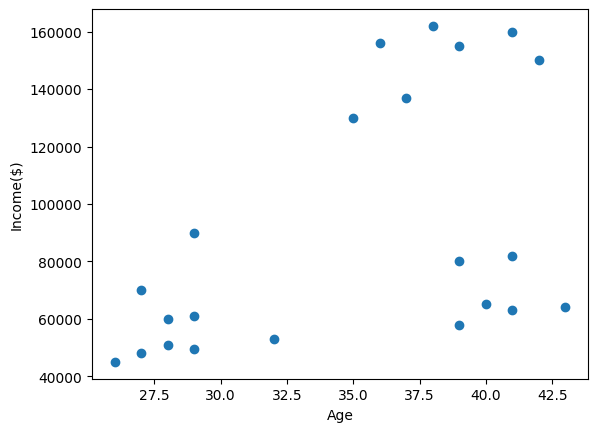

In [4]:
# Explore the Scattering of your clusters using a graph
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

<h4 style='color:purple'>Elbow Plot to Confirm the number of clusters</h4>

In [5]:
scaler = MinMaxScaler()
scaled_df = df[['Income($)','Age']]
scaler.fit(df[['Income($)']])
scaled_df['Income($)'] = scaler.transform(scaled_df[['Income($)']])

scaler.fit(df[['Age']])
scaled_df['Age'] = scaler.transform(scaled_df[['Age']])

In [6]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(scaled_df[['Age','Income($)']])
    sse.append(km.inertia_)

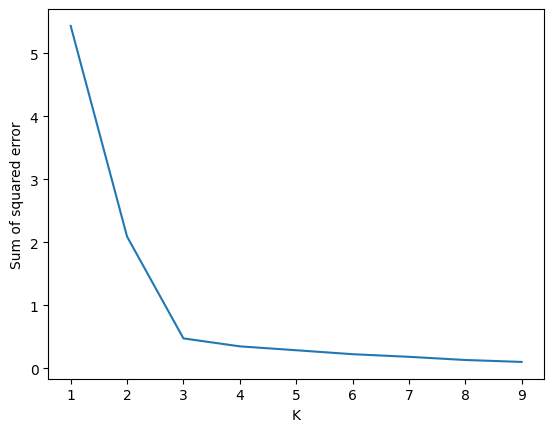

In [7]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [8]:
km_model = KMeans(n_clusters=3) # Create the Kmeans Object model for your data
y_predicted = km_model.fit_predict(df[['Age','Income($)']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [9]:
# Showing which individuals belong to which group
df['cluster']=y_predicted
df.head(10)

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


In [10]:
km.cluster_centers_

array([[0.91176471, 0.94017094],
       [0.35294118, 0.06837607],
       [0.86764706, 0.14957265],
       [0.08823529, 0.02884615],
       [0.58823529, 0.75641026],
       [0.11764706, 0.15954416],
       [0.68627451, 0.96296296],
       [0.82352941, 0.30769231],
       [0.17647059, 0.38461538]])

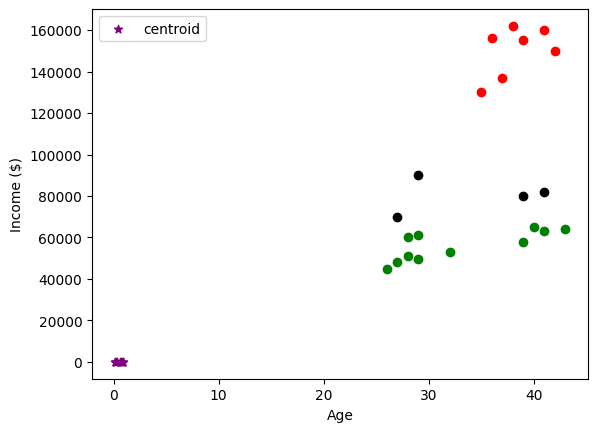

In [11]:
# Returning data that belongs to each clusters
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [ ]:
# The values are not properly clustered because our data are not scaled
# The income values is quite large. We use the MinMaxScaler to scale the data appropriately

<h4 style='color:purple'>Preprocessing using min max scaler</h4>

In [12]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [13]:
df.head(10) #The age and income is now within reasonable scale

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


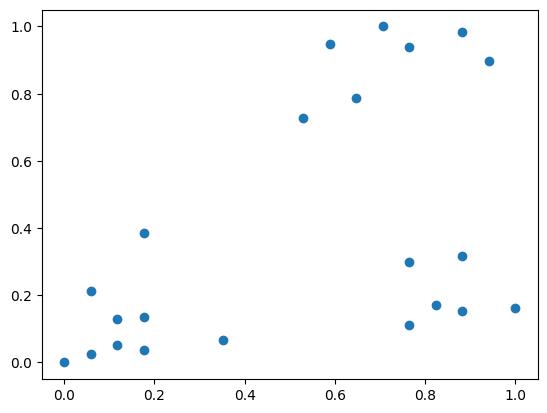

In [14]:
plt.scatter(df.Age,df['Income($)'])

In [15]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [16]:
df['cluster']=y_predicted
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [ ]:
km.cluster_centers_ # The x,y coordinates for each centroids 

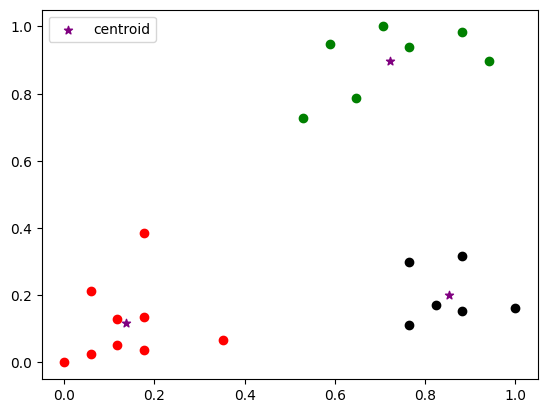

In [17]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [ ]:
# The next few codes determine the optimal number of centroids that best fit the data

<h4 style='color:purple'>Exercise</h4>

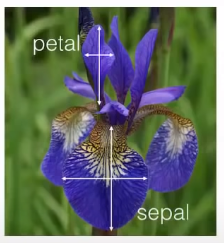

1. Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
2. Figure out if any preprocessing such as scaling would help here
3. Draw elbow plot and from that figure out optimal value of k

In [ ]:
# Solution

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

In [ ]:
iris = load_iris()

In [ ]:
iris_df = pd.DataFrame(iris.data,columns=iris.feature_names)
iris_df.head()

In [ ]:
iris_df['flower'] = iris.target
iris_df.head()

In [ ]:
# Continue from here based on class tutorials